In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy.matlib

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

In [5]:
# Cluster centers for training data
c1 = [2, 3]  # Cluster center for class 1
c2 = [10, 11]  # Cluster center for class 2

no = 50  # Number of samples in each class
class1 = np.matlib.repmat(c1, no, 1) + np.random.randn(no, len(c1))
class2 = np.matlib.repmat(c2, no, 1) + np.random.randn(no, len(c2))

D = np.append(class1, class2, axis=0)
Data = np.concatenate((D, np.ones((2 * no, 1))), axis=1)

# Labels for training data
c1_label = np.ones((no, 1))
c2_label = -1 * np.ones((no, 1))
label = np.concatenate((c1_label, c2_label), axis=0)

# Transpose Data and labels for easier handling
Data = Data.T
y = label.T


In [6]:
# Cluster centers for validation data
v1 = [5, 4]  # Cluster center for validation class 1
v2 = [7, 12]  # Cluster center for validation class 2
v_no = 30  # Number of samples in each class for validation
v_class1 = np.matlib.repmat(v1, v_no, 1) + np.random.randn(v_no, len(v1))
v_class2 = np.matlib.repmat(v2, v_no, 1) + np.random.randn(v_no, len(v2))

v_D = np.append(v_class1, v_class2, axis=0)
v_Data = np.concatenate((v_D, np.ones((2 * v_no, 1))), axis=1)

v_c1_label = np.ones((v_no, 1))
v_c2_label = -1 * np.ones((v_no, 1))
v_label = np.concatenate((v_c1_label, v_c2_label), axis=0)
v_Data = v_Data.T
v_y = v_label.T  # Validation labels

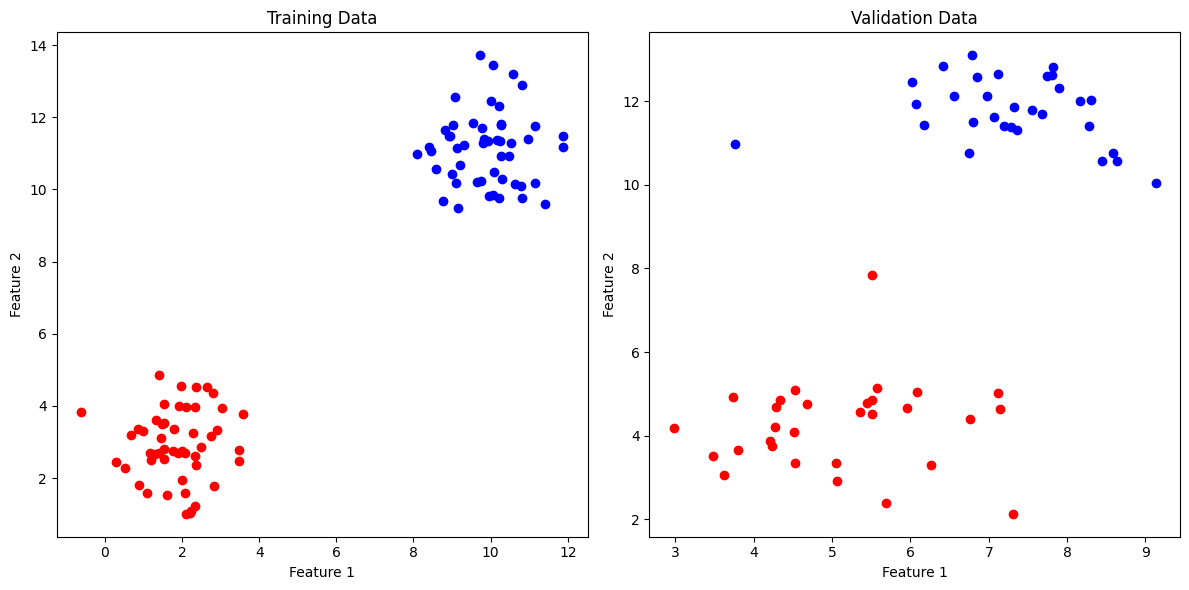

In [8]:
# Plotting training and validation data in subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Training data plot
axs[0].plot(class1[:, 0], class1[:, 1], 'ro', class2[:, 0], class2[:, 1], 'bo')
axs[0].set_title('Training Data')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Validation data plot
axs[1].plot(v_class1[:, 0], v_class1[:, 1], 'ro', v_class2[:, 0], v_class2[:, 1], 'bo')
axs[1].set_title('Validation Data')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Prediction function
def prediction(w, Data):
    pred = []
    z = np.dot(w, Data)
    a = sigmoid(z)
    for i in range(len(a[0])):
        if a[0][i] > 0.5:
            pred.append(1)
        else:
            pred.append(-1)
    return pred

In [10]:
# Hyperparameters
learning_rate = 0.01
w = np.random.randn(1, 3)

In [11]:
# Training loop
for i in range(1, 1500):
    z = np.dot(w, Data)
    y_pred = prediction(w, Data)
    val = -np.multiply(y, z)
    J = np.sum(np.log(1 + np.exp(val)))
    num = -np.multiply(y, np.exp(val))
    den = 1 + np.exp(val)
    f = num / den
    gradJ = np.dot(Data, f.T)
    w = w - learning_rate * gradJ.T

    print(f"Epoch {i}, Loss {J}, Training Accuracy {accuracy_score(y[0], y_pred) * 100:.2f}%")


Epoch 1, Loss 354.60811931309917, Training Accuracy 49.00%
Epoch 2, Loss 1167.420638159736, Training Accuracy 50.00%
Epoch 3, Loss 841.201292695283, Training Accuracy 50.00%
Epoch 4, Loss 515.0107724980128, Training Accuracy 50.00%
Epoch 5, Loss 192.19367372637456, Training Accuracy 51.00%
Epoch 6, Loss 237.31755973020014, Training Accuracy 49.00%
Epoch 7, Loss 1112.6009993145667, Training Accuracy 50.00%
Epoch 8, Loss 786.3847118340482, Training Accuracy 50.00%
Epoch 9, Loss 460.6139675781225, Training Accuracy 50.00%
Epoch 10, Loss 150.47355460877677, Training Accuracy 55.00%
Epoch 11, Loss 47.800620979679756, Training Accuracy 75.00%
Epoch 12, Loss 330.5429650575484, Training Accuracy 51.00%
Epoch 13, Loss 62.62392099286232, Training Accuracy 73.00%
Epoch 14, Loss 43.32100829916889, Training Accuracy 76.00%
Epoch 15, Loss 295.5066365173243, Training Accuracy 52.00%
Epoch 16, Loss 47.67466947533863, Training Accuracy 78.00%
Epoch 17, Loss 19.523676983716587, Training Accuracy 91.00%


In [12]:
# Test the model
Test_predict = prediction(w, v_Data)
print(f"Test Accuracy: {accuracy_score(v_y[0], Test_predict) * 100:.2f}%")


Test Accuracy: 88.33%


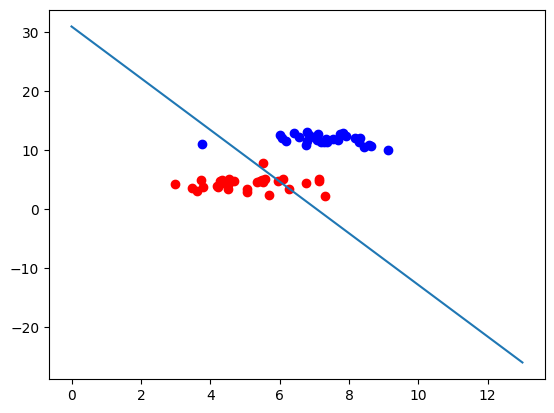

In [13]:
# Plot decision boundary
domain = np.linspace(0, 13, 100)
h_x = -(w[0, 0] / w[0, 1]) * domain - (w[0, 2] / w[0, 1])

plt.plot(v_class1[:, 0], v_class1[:, 1], 'ro', v_class2[:, 0], v_class2[:, 1], 'bo')
plt.plot(domain, h_x)
plt.show()